In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [7]:
##Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym 
#(ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

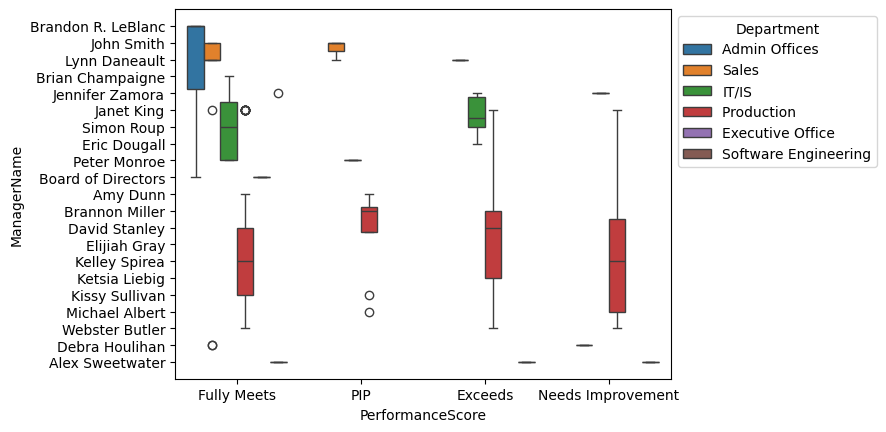

In [14]:
box = sns.boxplot(x='PerformanceScore',y='ManagerName',data=df,hue='Department')
sns.move_legend(box,"upper left", bbox_to_anchor=(1, 1))

In [3]:
manager_performance_counts = df.groupby('ManagerName')['PerformanceScore'].value_counts().unstack(fill_value=0)

print(manager_performance_counts)

PerformanceScore    Exceeds  Fully Meets  Needs Improvement  PIP
ManagerName                                                     
Alex Sweetwater           2            6                  1    0
Amy Dunn                  3           15                  1    2
Board of Directors        0            2                  0    0
Brandon R. LeBlanc        0            7                  0    0
Brannon Miller            7            9                  1    4
Brian Champaigne          0            8                  0    0
David Stanley             1           19                  1    0
Debra Houlihan            0            2                  1    0
Elijiah Gray              2           18                  2    0
Eric Dougall              1            3                  0    0
Janet King                4           13                  2    0
Jennifer Zamora           2            4                  1    0
John Smith                0           12                  0    2
Kelley Spirea            

In [5]:
manager_performance_percentage = manager_performance_counts.div(manager_performance_counts.sum(axis=1), axis=0) * 100

print(manager_performance_percentage)

PerformanceScore      Exceeds  Fully Meets  Needs Improvement        PIP
ManagerName                                                             
Alex Sweetwater     22.222222    66.666667          11.111111   0.000000
Amy Dunn            14.285714    71.428571           4.761905   9.523810
Board of Directors   0.000000   100.000000           0.000000   0.000000
Brandon R. LeBlanc   0.000000   100.000000           0.000000   0.000000
Brannon Miller      33.333333    42.857143           4.761905  19.047619
Brian Champaigne     0.000000   100.000000           0.000000   0.000000
David Stanley        4.761905    90.476190           4.761905   0.000000
Debra Houlihan       0.000000    66.666667          33.333333   0.000000
Elijiah Gray         9.090909    81.818182           9.090909   0.000000
Eric Dougall        25.000000    75.000000           0.000000   0.000000
Janet King          21.052632    68.421053          10.526316   0.000000
Jennifer Zamora     28.571429    57.142857         

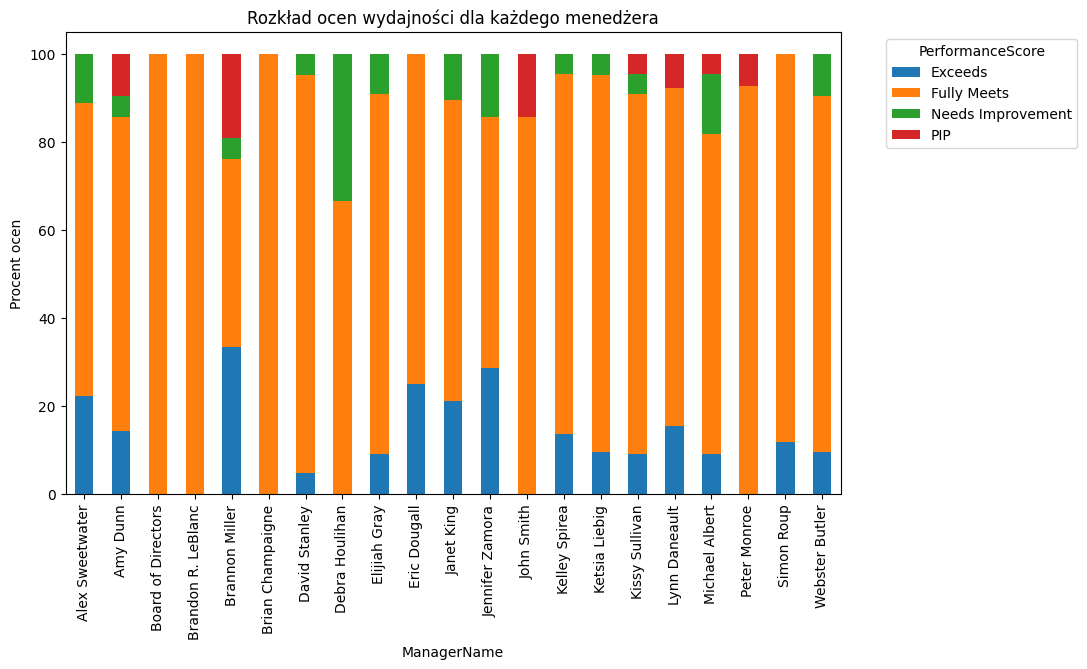

In [6]:
manager_performance_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Rozkład ocen wydajności dla każdego menedżera")
plt.xlabel("ManagerName")
plt.ylabel("Procent ocen")
plt.legend(title="PerformanceScore", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
manager_department = df.groupby('ManagerName')['Department'].value_counts().unstack(fill_value=0)

print(manager_department)


Department          Admin Offices  Executive Office  IT/IS  Production         \
ManagerName                                                                     
Alex Sweetwater                 0                 0      0                  0   
Amy Dunn                        0                 0      0                 21   
Board of Directors              1                 1      0                  0   
Brandon R. LeBlanc              7                 0      0                  0   
Brannon Miller                  0                 0      0                 21   
Brian Champaigne                0                 0      8                  0   
David Stanley                   0                 0      0                 21   
Debra Houlihan                  0                 0      0                  0   
Elijiah Gray                    0                 0      0                 22   
Eric Dougall                    0                 0      4                  0   
Janet King                  

<Axes: xlabel='Department', ylabel='PayRate'>

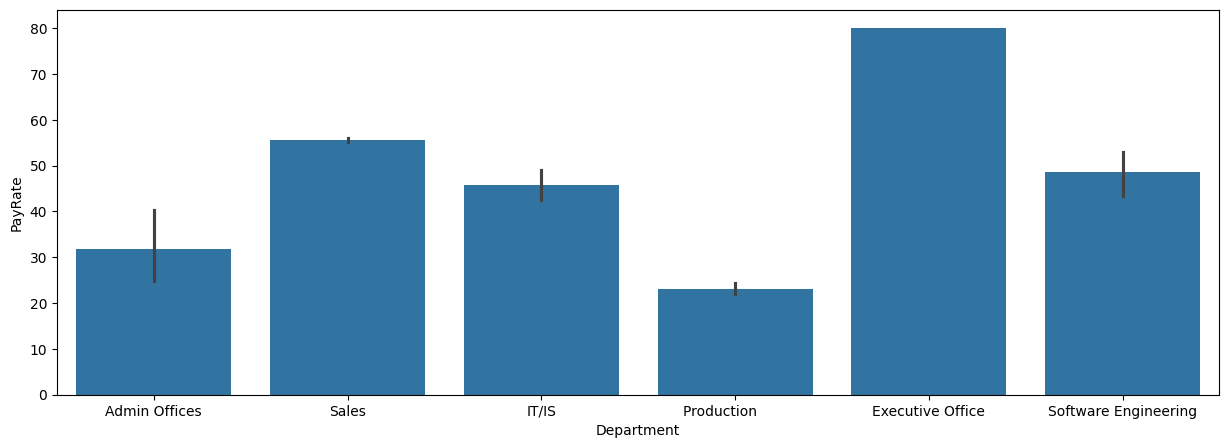

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df)

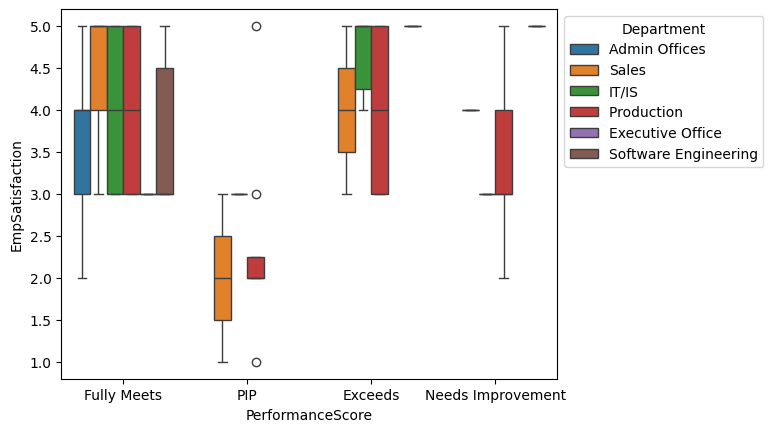

In [19]:
box2 = sns.boxplot(x='PerformanceScore',y='EmpSatisfaction',data=df,hue='Department')
sns.move_legend(box2,"upper left", bbox_to_anchor=(1, 1))

Według mnie rozkład ocen wydajności dla każdego managera jest dość równomierny. Każdy z nich w dużej mierze ocenia swojego pracownika na "fully meets". Odsetek "PIP" jest dużo mniejszy aniżeli dla "Exceeds" co także jest pozytywne jeśli chodzi o ocenę pracownika. Sumując każdy z menegerów ocenia swojego pracownika bardzo dobrze bo każdy w większości swoich ocen ma "fully meets". Jedyne widoczne odchylenia są w przypadku 2 pracowników działu Admin Offices i Executive Office gdzie jest 1 osoba i jest to CEO. Według mnie zależność między tym kto jest przełożonym a performance score jest znikoma bo oceny pracowników są na wysokim poziomie i nie ma to większego znaczenia kto jest przełożonym bo nawet gdyby jeden pracownik codziennie miał innego przełożonego to jest większe prawdopodobieństwo że spotka się z oceną dobrą  aniżeli PIP czy needs improvement. Należałoby szukać zależności między performance score wystawianego przez managera a zadowoleniem pracownika. Jak widać na wykresie tam gdzie jest fully meets czy exceeds i zadowolenie jest wyższe ale też jakąs część pracowników ocenianych najgorzej też ma takie samo zadowolenie jak ci oceniani na fully meets. W sales, IT i production mamy najwięcej rozbieżności. Na podstawie tych wykresów cięzko określić czy istnieją tutaj jasne zależności. 

In [21]:
#Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [28]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [30]:
import datetime as dt
import numpy as np

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(365,'D')

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.923288
1,2014-01-06,NaT,5.726027
2,2014-09-29,NaT,4.997260
3,2015-02-16,2015-04-15,0.158904
4,2015-05-01,NaT,4.410959


<Axes: xlabel='Seniority', ylabel='RecruitmentSource'>

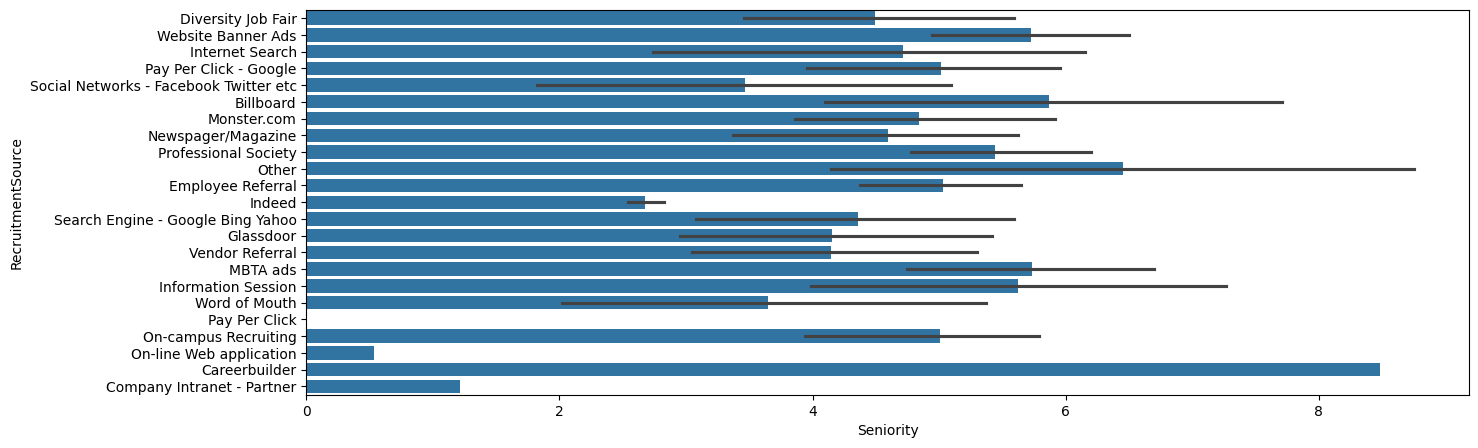

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x='Seniority',y='RecruitmentSource',data=df)

Jeśli zależy nam na jak najdłuższym stazu pracownika najlepszymi recruitment source są: careerbuilder, other i billboard. Inne wyróżniające się to: Website Banner Ads, MBTA Ads i Information Session.

In [33]:
#Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

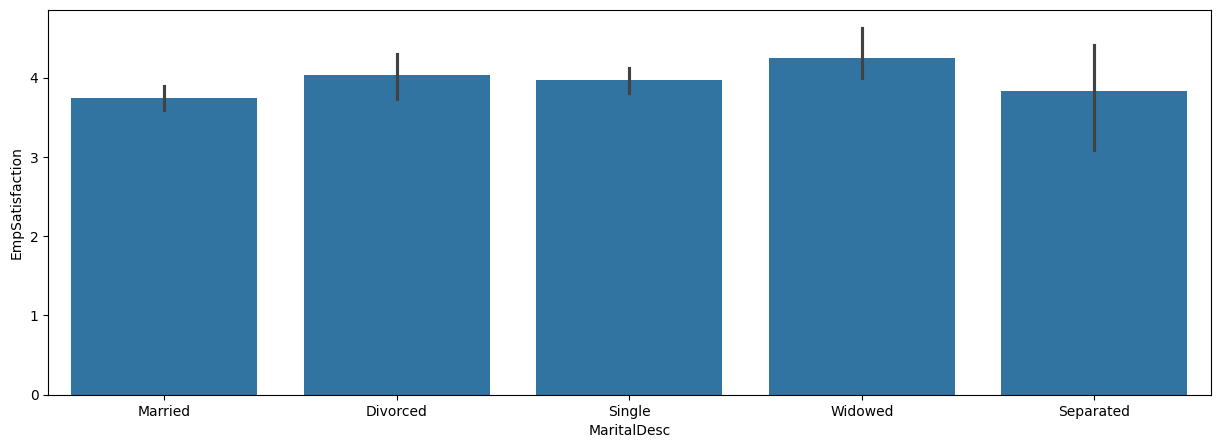

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

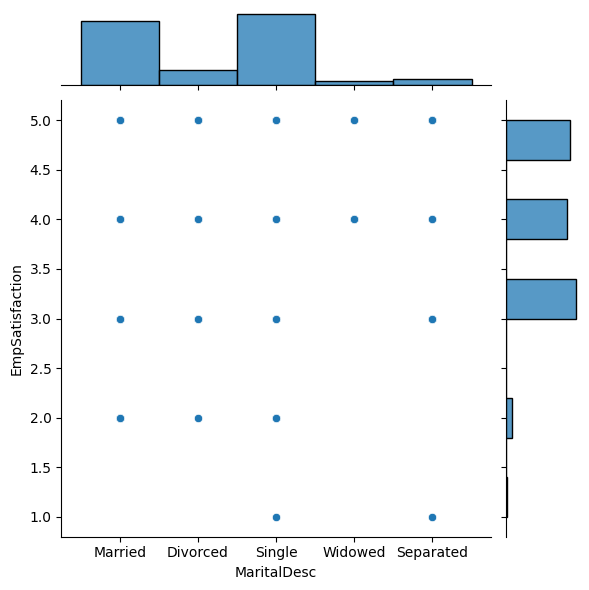

In [42]:
sns.jointplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

In [47]:
df['MaritalDesc'].value_counts()

MaritalDesc
Single       137
Married      123
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

Najliczniejszą grubą wśród pracowników są single i married. Najmniej liczną widowed. Poziom zadowolenia z pracy jesr wyrównany ponieważ ocen od 3 do 5 jest najwięcej w każdej grupie oprócz widowed ponieważ ta grupa wydaje się być tą najbardziej zadowoloną. Uważam też że w grupach single i married oceny są najbardziej zróżnicowane ale tych niskich ocen jest niewiele. Według mnie stan cywilny nie ma znaczego wpływu na poziom zadowolenia z pracy.

In [51]:
#Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [67]:
df[['Termd','DOB','DateofTermination']].head()

,Termd,DOB,DateofTermination
0,0.0,1987-11-24,NaT
1,0.0,1984-04-26,NaT
2,0.0,1986-09-01,NaT
3,1.0,1985-09-16,2015-04-15
4,0.0,1988-05-19,NaT


tam gdzie jest termd=0 to pracownik nadal pracuje, bo DateofTermination ma datę wpisaną tylko gdy termd=1

In [68]:
working_employees = df[df['Termd'] == 0]
working_employees

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,...,John Smith,17.0,Billboard,Fully Meets,5.00,5.0,0.0,1/21/2019,0.0,5.112329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0,4.882192
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0,4.882192
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0,3.243836
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0,4.882192


In [65]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

In [87]:
from datetime import datetime
current_date = datetime.now()
working_employees['Age'] = working_employees['DOB'].apply(lambda dob: (current_date - dob).days // 365)
print(working_employees[['DOB', 'Age']])

           DOB  Age
0   1987-11-24   36
1   1984-04-26   40
2   1986-09-01   38
4   1988-05-19   36
7   2063-05-15  -39
..         ...  ...
305 2052-01-18  -28
306 1986-04-23   38
307 1983-02-09   41
308 2065-09-09  -41
309 1978-05-02   46

[207 rows x 2 columns]


C:\Users\matyj\AppData\Local\Temp\ipykernel_5356\2512901913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_employees['Age'] = working_employees['DOB'].apply(lambda dob: (current_date - dob).days // 365)


In [88]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,0.158904
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Age', ylabel='EmpID'>

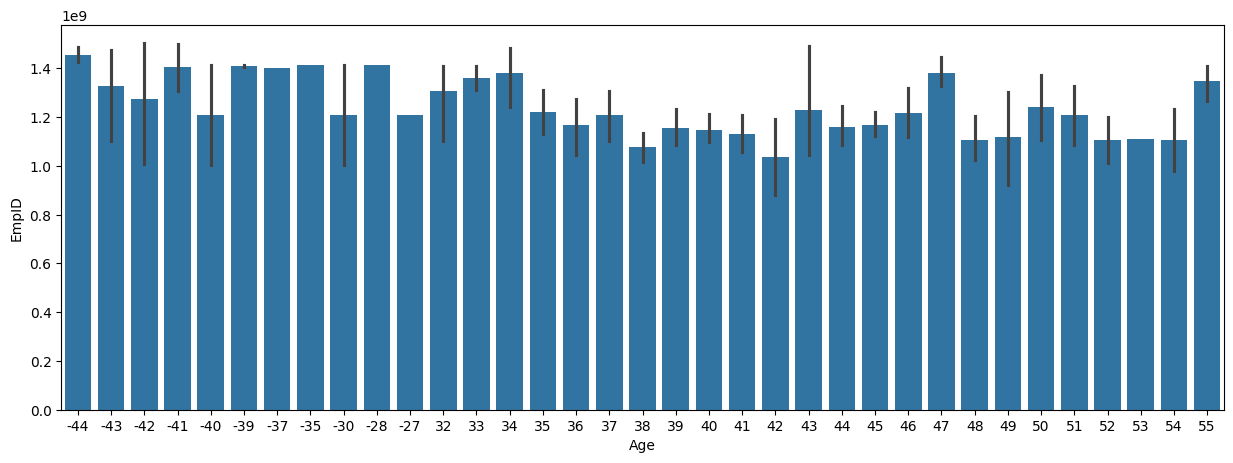

In [90]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='EmpID',data=working_employees)

In [91]:
future_birthdays = df[df['DOB'] > datetime.now()]

print("Pracownicy z datą urodzenia w przyszłości:")
print(future_birthdays[['DOB']])

Pracownicy z datą urodzenia w przyszłości:
           DOB
6   2064-06-01
7   2063-05-15
12  2054-10-12
22  2063-08-28
31  2068-01-15
32  2065-05-07
54  2066-03-17
57  2064-01-04
61  2068-07-06
73  2054-09-21
74  2068-10-10
87  2055-11-14
91  2067-04-19
101 2065-05-09
102 2065-09-09
112 2067-06-03
115 2068-07-20
116 2067-06-05
146 2068-08-15
155 2064-04-13
157 2068-05-30
159 2061-06-19
160 2068-06-06
164 2058-12-27
175 2065-02-02
184 2066-03-22
195 2051-01-02
200 2059-08-19
213 2055-04-14
215 2052-08-18
231 2064-10-12
235 2058-11-07
242 2067-01-16
247 2063-10-30
248 2053-05-24
249 2066-04-17
250 2051-02-25
279 2052-02-11
298 2066-11-22
303 2064-07-30
305 2052-01-18
308 2065-09-09


In [93]:
working_employees = df[df['Termd'] == 0]
working_employees['Age'] = working_employees['DOB'].apply(
    lambda dob: (current_date - dob).days // 365 if pd.notnull(dob) and dob <= current_date else None
)
working_employees

C:\Users\matyj\AppData\Local\Temp\ipykernel_5356\243737387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_employees['Age'] = working_employees['DOB'].apply(


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288,36.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027,40.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260,38.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959,36.0
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,...,17.0,Billboard,Fully Meets,5.00,5.0,0.0,1/21/2019,0.0,5.112329,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,2/12/2019,0.0,4.882192,NaN
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0,4.882192,38.0
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,1/14/2019,0.0,3.243836,41.0
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,1/2/2019,0.0,4.882192,NaN


<Axes: xlabel='Age', ylabel='EmpID'>

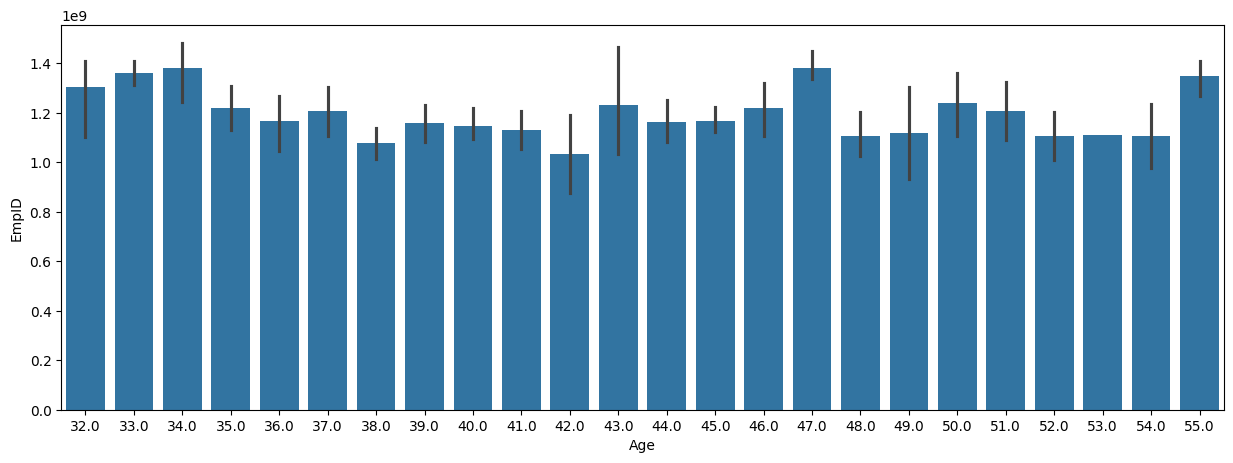

In [94]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='EmpID',data=working_employees)

W firmie aktualnie zatrudnieni są pracownicy w przedziale wiekowym od 32 do 55 lat. 

In [95]:
working_employees['Age'].mean()

np.float64(42.469613259668506)

Średnia wieku aktualnie zatrudnionych to 42 lata.

In [96]:
#Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [98]:
working_employees['Age'].min()

np.float64(32.0)

In [99]:
working_employees['Age'].max()

np.float64(55.0)

Nie wiem jak interpretować młodsi pracownicy i starsi, czy ma to być jakiś konkretny przedział. Dlatego ustalę że jeśli średnia wieku wynosi 42 lata to osoby poniżej 42 lat będą to młodsi pracownicy a osoby powyżej 42 lat będą to starsi pracownicy.

In [102]:
working_employees['Age'].dtype

dtype('float64')

In [103]:
working_employees['SpecialProjectsCount'].dtype

dtype('float64')

In [105]:
less_than_42 = working_employees[working_employees['Age'] <= 42]
less_than_42

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288,36.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027,40.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260,38.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959,36.0
8,"Dietrich, Jenna",1.408069e+09,0.0,0.0,0.0,1.0,6.0,1.0,0.0,55.00,...,17.0,Website Banner Ads,PIP,2.30,1.0,0.0,1/29/2019,0.0,7.605479,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"Szabo, Andrew",1.201031e+09,0.0,0.0,1.0,1.0,4.0,4.0,0.0,48.00,...,10.0,MBTA ads,Exceeds,2.61,5.0,5.0,2/18/2019,0.0,5.227397,41.0
300,"Boutwell, Bonalyn",1.307060e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,34.95,...,3.0,Diversity Job Fair,Fully Meets,5.00,4.0,3.0,2/18/2019,0.0,4.613699,37.0
302,"Carr, Claudia N",1.010022e+09,0.0,0.0,0.0,2.0,3.0,3.0,0.0,61.30,...,4.0,Vendor Referral,Fully Meets,5.00,5.0,6.0,2/18/2019,0.0,3.243836,38.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,1/7/2019,0.0,4.882192,38.0


<Axes: xlabel='Age', ylabel='SpecialProjectsCount'>

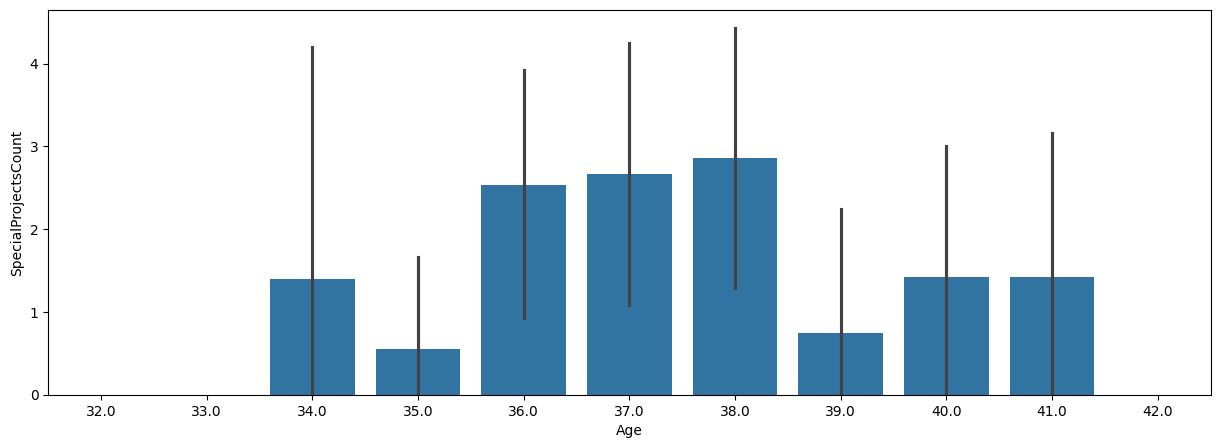

In [117]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='SpecialProjectsCount',data=less_than_42)

Najwięcej projektów posiadają osoby w przedziale wiekowym od 36 do 38 lat, jednak ta ilośc nie sięga wyżej niż 4-5 projektów max. Pracownicy poniżej 34 lat nie mają ich wcale.

In [110]:
more_than_42 = working_employees[working_employees['Age'] > 42]
more_than_42

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority,Age
10,"Friedman, Gerry",1.204033e+09,0.0,0.0,1.0,1.0,6.0,3.0,1.0,55.50,...,17.0,Diversity Job Fair,Fully Meets,3.65,5.0,0.0,1/17/2019,0.0,8.564384,55.0
15,"Mullaney, Howard",1.306058e+09,0.0,0.0,1.0,1.0,6.0,1.0,0.0,55.00,...,17.0,Internet Search,PIP,1.93,3.0,0.0,1/30/2019,0.0,4.997260,49.0
20,"Buck, Edward",1.504073e+09,1.0,1.0,1.0,1.0,6.0,3.0,0.0,55.00,...,21.0,Employee Referral,Fully Meets,3.31,5.0,0.0,1/28/2019,0.0,4.997260,49.0
24,Jeremy Prater,1.001085e+09,1.0,1.0,1.0,1.0,6.0,1.0,0.0,56.00,...,21.0,Website Banner Ads,PIP,1.81,2.0,0.0,1/17/2019,0.0,5.380822,50.0
25,"Khemmich, Bartholemew",1.104025e+09,0.0,0.0,1.0,1.0,6.0,3.0,0.0,55.00,...,21.0,Pay Per Click - Google,Fully Meets,2.19,5.0,0.0,1/22/2019,0.0,6.109589,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,"Wang, Charlie",1.009920e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,51.00,...,13.0,Indeed,Fully Meets,3.42,4.0,7.0,1/4/2019,0.0,2.613699,43.0
289,"Andreola, Colby",1.107027e+09,0.0,0.0,0.0,1.0,4.0,3.0,0.0,47.60,...,10.0,Vendor Referral,Fully Meets,3.04,3.0,4.0,1/2/2019,0.0,4.882192,45.0
291,"Del Bosque, Keyla",1.203032e+09,0.0,0.0,0.0,1.0,4.0,3.0,0.0,57.12,...,10.0,Monster.com,Fully Meets,3.79,5.0,5.0,1/25/2019,0.0,7.720548,45.0
299,"Foster-Baker, Amy",1.201031e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,34.95,...,9.0,Other,Fully Meets,5.00,3.0,2.0,2/8/2019,0.0,10.731507,45.0


<Axes: xlabel='Age', ylabel='SpecialProjectsCount'>

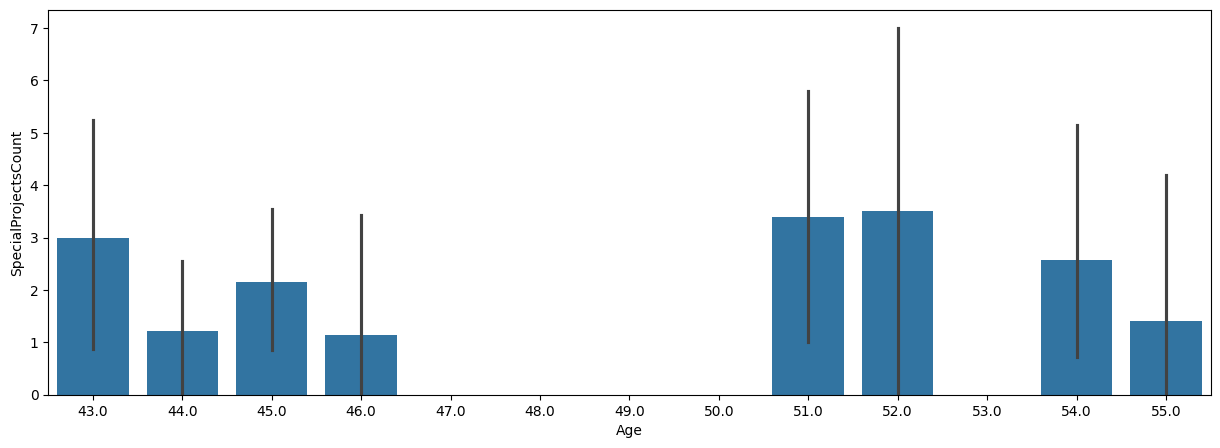

In [116]:
plt.figure(figsize=(15,5))
sns.barplot(x='Age',y='SpecialProjectsCount',data=more_than_42)

Osoby w wieku od 43 do 46 mają po tyle samo projektów co osoby młodsze. Potem jest przerwa w której osoby od wieku 47 do 50 nie posiadają projektów. Następnie wiek 51-52 oraz 54 posiada sporą ilość projektów. Sumując od wieku 34 lata do 46 lat jest ciągłość i w tym przedziale osoby mają najwięcej projektów, pomimo tego że w wieku 51-52 jest ich więcej aniżeli przypada na jeden dany wiek to są to tylko dwa lata co jest niewielką ilośćią w porównaniu do przedziału 34-46.  

In [122]:
below_42_projects = working_employees[working_employees['Age'] < 42]['SpecialProjectsCount'].sum()
above_42_projects = working_employees[working_employees['Age'] >= 42]['SpecialProjectsCount'].sum()

print(f"Liczba projektów dla osób poniżej 42 roku życia: {below_42_projects}")
print(f"Liczba projektów dla osób w wieku 42 lata i więcej: {above_42_projects}")

Liczba projektów dla osób poniżej 42 roku życia: 157.0
Liczba projektów dla osób w wieku 42 lata i więcej: 120.0


Na podstawie tych wyliczeń można powiedzieć że osoby młodsze poniżej 42 roku życia mają więcej specjalnych projektów niż osoby starsze.